In [11]:
import qi #pepper와의 연결 및 모듈의 proxy(클라이언트와 서버 사이에 데이터를 전송하는)관리.
import argparse
import sys
import motion
import almath
import math
from matplotlib import pyplot as plt
import time
import numpy as np
import naoqi as n
import pepper_kinematics as pk
from pepper_kinematics import forward_kinematics
import Tkinter as tk
import math
import numpy as np

In [12]:
sys.path.append('./pepper_kinematics/')
sys.path.append('./simulation_draw_vector/')

import drawRobotics as dR
import Euler_Angles

In [13]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [14]:
import os
path = './example'
initial_joint = np.load(os.path.join(path, 'joint_data.npy'))
np.array([initial_joint[30]]).shape

(1, 5)

In [15]:
predict_n = np.load('./example/predict.npy')
joint_input = np.load('./example/joint_data.npy')
xyz_input = np.load('./example/position_data.npy')

In [16]:
predict = np.concatenate((np.array([initial_joint[30]]), predict_n))

In [17]:
predict.shape

(201, 5)

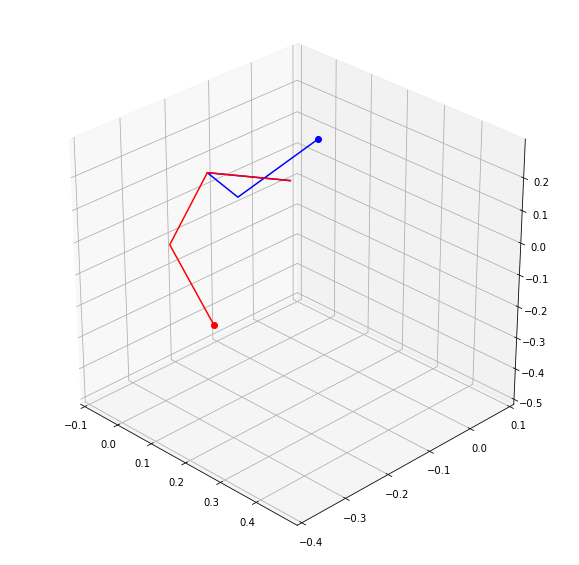

([<mpl_toolkits.mplot3d.art3d.Line3D at 0x7eff8a1e0790>],
 [<mpl_toolkits.mplot3d.art3d.Line3D at 0x7eff8a1eb0d0>])

In [18]:
@interact
def plot_robot(i = (0,len(predict)-2)):
    
    current_position, current_orientation = pk.right_arm_get_position(joint_input[i,:])
    predict_position, predict_orientation = pk.right_arm_get_position(predict[i,:])
    Torso = np.array([[1, 0, 0, 0], 
                      [0, 1, 0, 0],
                      [0, 0, 1, 0], 
                      [0, 0, 0, 1]])

    #T1, T2, T3, T4, T5, T6 = pk.Right_arm_get_trans(joint_input[0][i])
    T1, T2, T3, T4, T5, T6 = pk.right_arm_get_trans(joint_input[i,:])
    t1, t2, t3, t4, t5, t6= pk.right_arm_get_trans(predict[i,:])
    
    x = np.array([Torso[:,3][0], T1[:,3][0], T3[:,3][0], T6[:,3][0]])
    y = np.array([Torso[:,3][1], T1[:,3][1], T3[:,3][1], T6[:,3][1]])
    z = np.array([Torso[:,3][2], T1[:,3][2], T3[:,3][2], T6[:,3][2]])
    
    x2 = np.array([Torso[:,3][0], t1[:,3][0], t3[:,3][0], t6[:,3][0]])
    y2 = np.array([Torso[:,3][1], t1[:,3][1], t3[:,3][1], t6[:,3][1]])
    z2 = np.array([Torso[:,3][2], t1[:,3][2], t3[:,3][2], t6[:,3][2]])
    
    fig = plt.figure(figsize = (10,10))
    
    ax = plt.axes(projection = '3d')
    

    #ax.invert_xaxis()
    ax.view_init(30, -45)
    #fig2 = plt.figure(figsize = (10,10))
    #ax2 = plt.axes()
    
    ax.set_xlim(-0.1, 0.5)
    ax.set_ylim(-0.4,0.1)
    ax.set_zlim(-0.5,0.3)
    #predict = red, lab = blue
    
    return ax.plot(x,y,z, 'b'), ax.plot(x2,y2,z2, 'r'), ax.plot([current_position[0]], [current_position[1]], [current_position[2]], 'bo'), ax.plot([predict_position[0]], [predict_position[1]], [predict_position[2]], 'ro') 

### Pepper front camera image

In [ ]:
import naoqi as n
import qi
import argparse
import sys
import time
import vision_definitions
import cv2
import numpy
from PIL import Image
import datetime

nao_ip = "192.168.0.25"
port = 9559
V = n.ALProxy("ALVideoDevice", nao_ip, port)

# Register a Generic Video Module
resolution = vision_definitions.kQVGA # (320x240)
colorSpace = 10 #vision_definitions.kYUVColorSpace
fps = 30

videoClient = V.subscribe("pepper_video", resolution, colorSpace, fps)
prevTime = 0
output_path = '/home/mmmil-hw/beom_ws/keras/project.mp4'
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'DIVX'), 5, (320,240))
while True:
    
    naoImage = V.getImageRemote(videoClient)
    curTime = time.time()
    sec = curTime - prevTime
    preTime = curTime
    
    FPS = 1 / (sec)

    
    # Get the image size and pixel array.
    imageWidth = naoImage[0]
    imageHeight = naoImage[1]
    array = naoImage[6]
    image_string = str(bytearray(array))
    
    im = Image.frombytes("RGB", (imageWidth, imageHeight), image_string)
    
    #image = cv2.cvtColor(numpy.array(im), cv2.COLOR_YUV2RGB)#, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(numpy.array(im), cv2.COLOR_YUV2BGR)#, cv2.COLOR_BGR2RGB)
    
    #out.write(image)
    cv2.imshow("pepper_",image)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        V.unsubscribe(videoClient)
        out.release()
        cv2.destroyAllWindows()
        break